<mark>Analysis practical</mark>      

# Ch. 2: Graphing and visually exploring EMG data

```{card}
:class-card: sd-outline-primary

**Authors:** Erin McKiernan (1,2), Ana Daniela del Rio Pulido(1), Noel Isaias Plascencia Diaz(1), Mitsui Myrna Salgado Saito(1)       
**Affiliation:** (1) Universidad Nacional Autónoma de México (UNAM), (2) Open Research Community Accelerator (ORCA)   
**Date:** February 16, 2025
```

## Overview

The objective of this data analysis practical is to graph and explore EMG recordings made from different skeletal muscles during various physical activities. The recordings visualized below can be found in our GitHub repository (<https://github.com/emckiernan/electrophys/tree/master/EMG/EMGbasics/data>), or new recordings can be obtained by performing the experimental practical in [Ch. 1: Muscle physiology and EMG basics](oxa:EPpXta8zJdzN048lz8AR/hZTnTYzQR5EQmCKX51Wj "Ch. 1: Muscle physiology and EMG  basics "). The duration of this practical could vary depending on the programming experience of students and the goals of the class. This practical could be carried out in multiple sessions, especially if students are asked to first record EMGs and then graph their own recordings. Or, since this is an analysis practical, it could be done asynchronously as an assigned homework.

## Setting up the notebook

We begin by setting up the Jupyter notebook and importing the Python modules for plotting figures. We include commands to view plots in the notebook, and to create figures with good resolution and large labels.

In [4]:
# command to view figures in Jupyter notebook
%matplotlib inline 

# import plotting module 
import matplotlib.pyplot as plt 

# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 18 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 20 # fontsize for figure titles
plt.rcParams['font.size'] = 16 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.6 # line width for plotting

Next, we import various modules for extracting data and scientific computing.

In [5]:
import numpy as np
import scipy as sc
import wave

The following cell makes a copy of the necessary data files for this lesson from repository [https://github.com/emckiernan/electrophys/tree/master/EMG/EMGbasics/data](https://github.com/emckiernan/electrophys/tree/master/EMG/EMGbasics/data)

In [14]:
import os
import requests

# List of exact filenames (as used in the repo and expected locally)
data_files = [
    "S10_EMG_bicep_intermittent.wav",
    "S10_EMG_bicep_recruitment.wav",
    "S10_EMG_calf_intermittent.wav",
    "S1_EMG_tricep_dips.wav",
    "S1_EMG_tricep_twistWeight.wav",
    "S2_EMG_forearm_grip.wav",
    "S2_EMG_forearm_wrestle.wav",
    "S3_EMG_jawMuscle_chewSmile.wav",
    "S5_EMG_abs_legLift3.wav",
    "S5_EMG_abs_plank.wav",
    "S9_EMG_quadricep_oneLegSquat1.wav",
    "S9_EMG_quadricep_squatSustained.wav"
]

# GitHub raw download base URL (preserving original filename case)
base_url = "https://github.com/emckiernan/electrophys/raw/refs/heads/master/EMG/EMGbasics/data/"

# Local data directory
target_dir = "data"
os.makedirs(target_dir, exist_ok=True)

# Download files if not already present
for name in data_files:
    local_path = os.path.join(target_dir, name)
    if not os.path.exists(local_path):
        print(f"Downloading {name}...")
        url = base_url + name
        response = requests.get(url)
        if response.status_code == 200:
            with open(local_path, "wb") as f:
                f.write(response.content)
        else:
            print(f"⚠️ Failed to download {name}: HTTP {response.status_code}")


## Extracting and graphing the data

EMG recordings were obtained using the Backyard Brains Muscle SpikerBox, and are saved as audio files in .wav format. So, we first have to open the .wav files and extract the data. We can also extract the number of recording channels and sampling rate.

In [16]:
# open .wav file by specifying the path and filename
record = wave.open('data/S10_EMG_calf_intermittent.wav', 'r')

# extract number of channels, sample rate, data
numChannels = record.getnchannels() # number of channels
N = record.getnframes() # humber of frames
sampleRate = record.getframerate() # sampling rate
dstr = record.readframes(N * numChannels)
waveData = np.frombuffer(dstr, np.int16)

# get the time window
timeEMG=np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

# calculate frequency
freq = 1/np.mean(np.diff(timeEMG))

print('The recording has %d channel(s).' % (numChannels))
print('The sampling rate of the recording is %d Hz.' % (sampleRate))

The recording has 1 channel(s).
The sampling rate of the recording is 44100 Hz.


Now, let's plot the EMG. The following recording was made from the calf muscle during repeated calf raises.

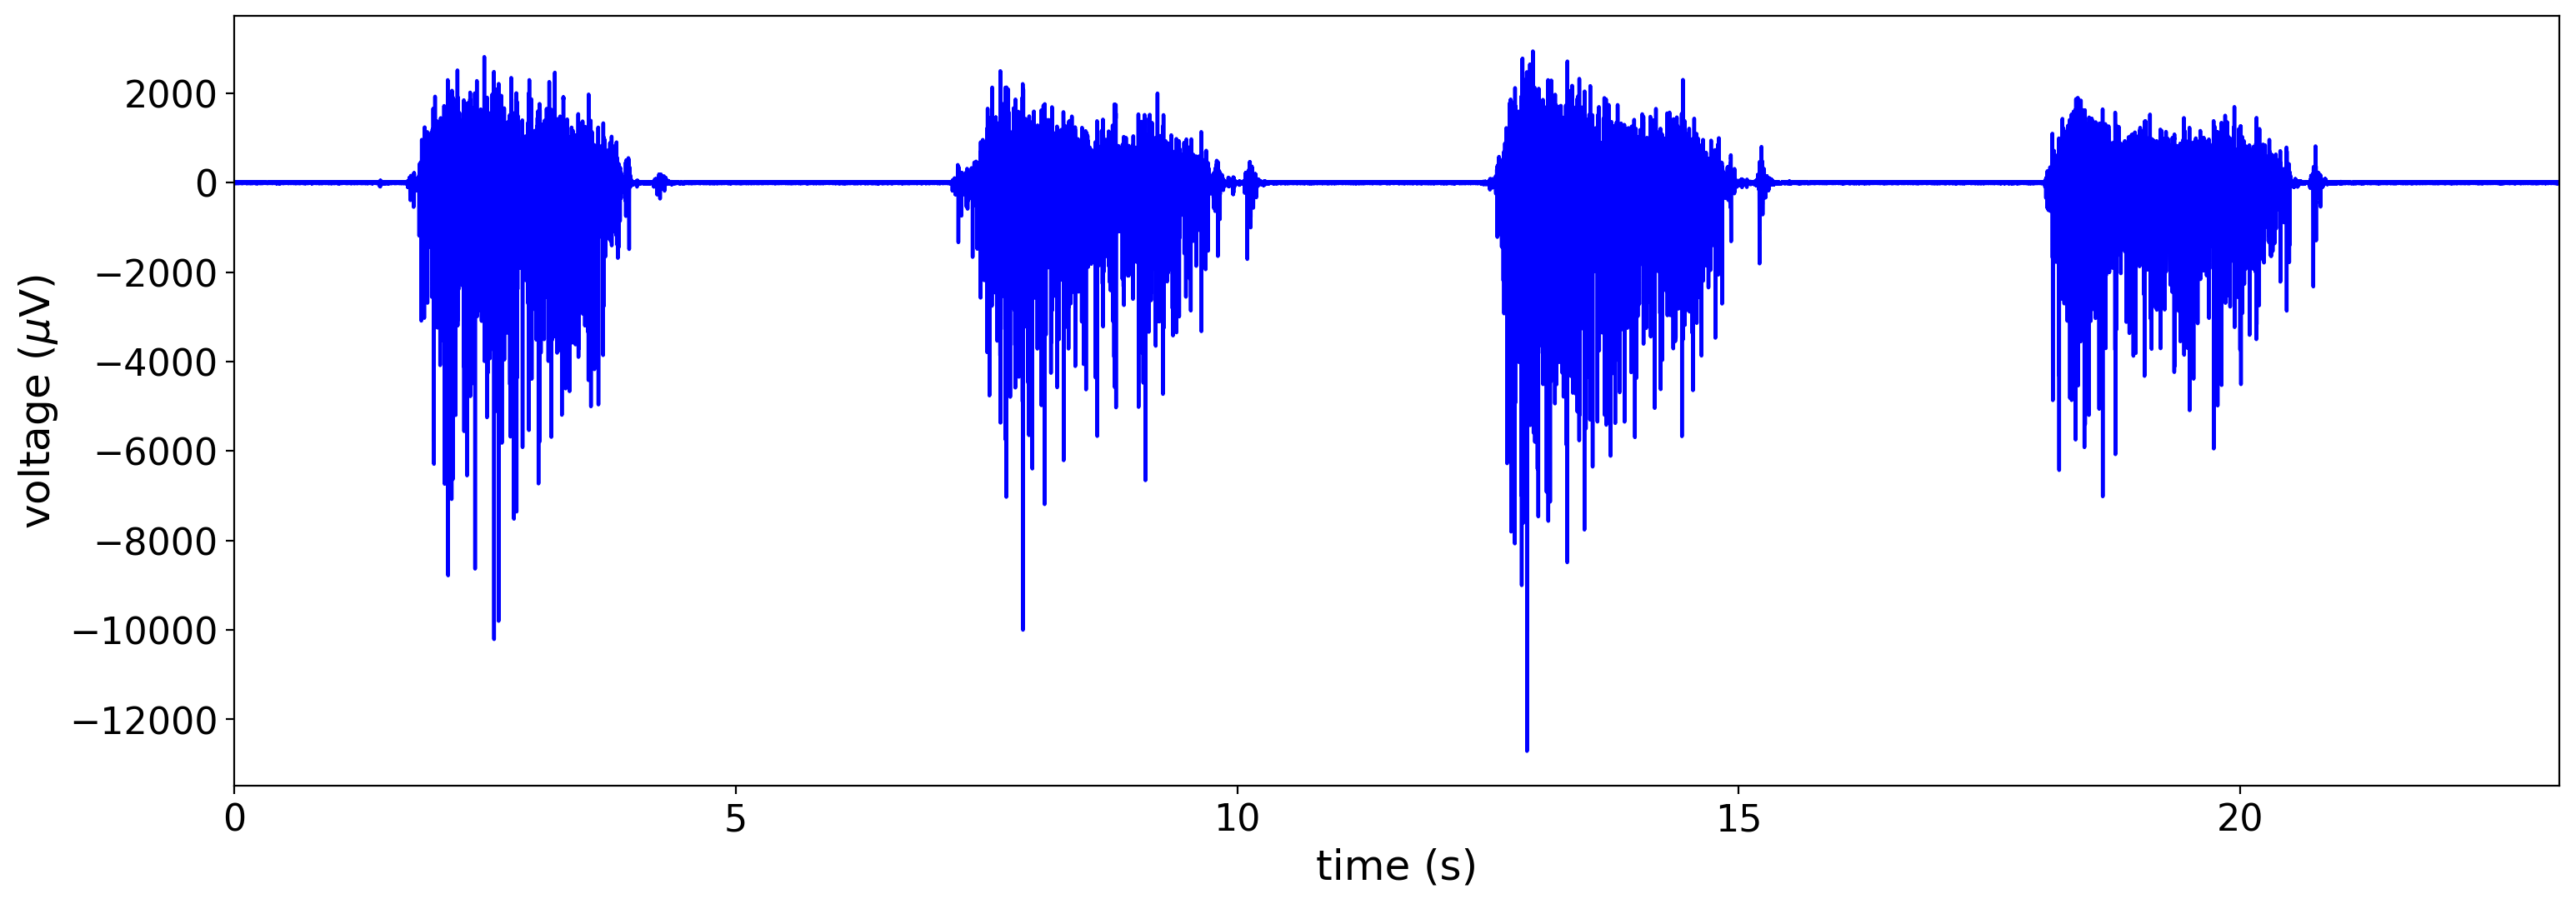

In [17]:
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeEMG,waveData, 'b')
plt.xlim(0,max(timeEMG));

We can define a function to allow us to quickly extract and graph different EMG recordings. The input to the function is the name of the file we want to analyze. 

In [18]:
def EMG(file):
    # open .wav file by specifying the path and filename
    record = wave.open(file)
    # extract number of channels, sample rate, data
    numChannels = record.getnchannels() # number of channels
    N = record.getnframes() # number of frames
    sampleRate = record.getframerate() # sampling rate
    # extract data from the .wav file
    dstr = record.readframes(N * numChannels)
    waveData = np.frombuffer(dstr, np.int16)
    # print the number of channels and sample rate
    print('The recording has %d channel(s).' % (numChannels))
    print('The sampling rate of the recording is %d Hz.' % (sampleRate))
    # calculate time window
    timeEMG=np.linspace(0, len(waveData)/sampleRate, num=len(waveData))
    # calculate frequency
    freq = 1/np.mean(np.diff(timeEMG))
    # plot EMG
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeEMG,waveData, 'b')
    plt.xlim(0,max(timeEMG));
    
    return

## Exploring the activity of different muscles

Using our function, we can now dive into our repository of recordings and look at the EMGs of different muscles recorded during various physical activities.

### Biceps muscle

The following EMG was recorded from the biceps muscle during repeated (3) contractions with intermittent rest periods.

The recording has 1 channel(s).
The sampling rate of the recording is 44100 Hz.


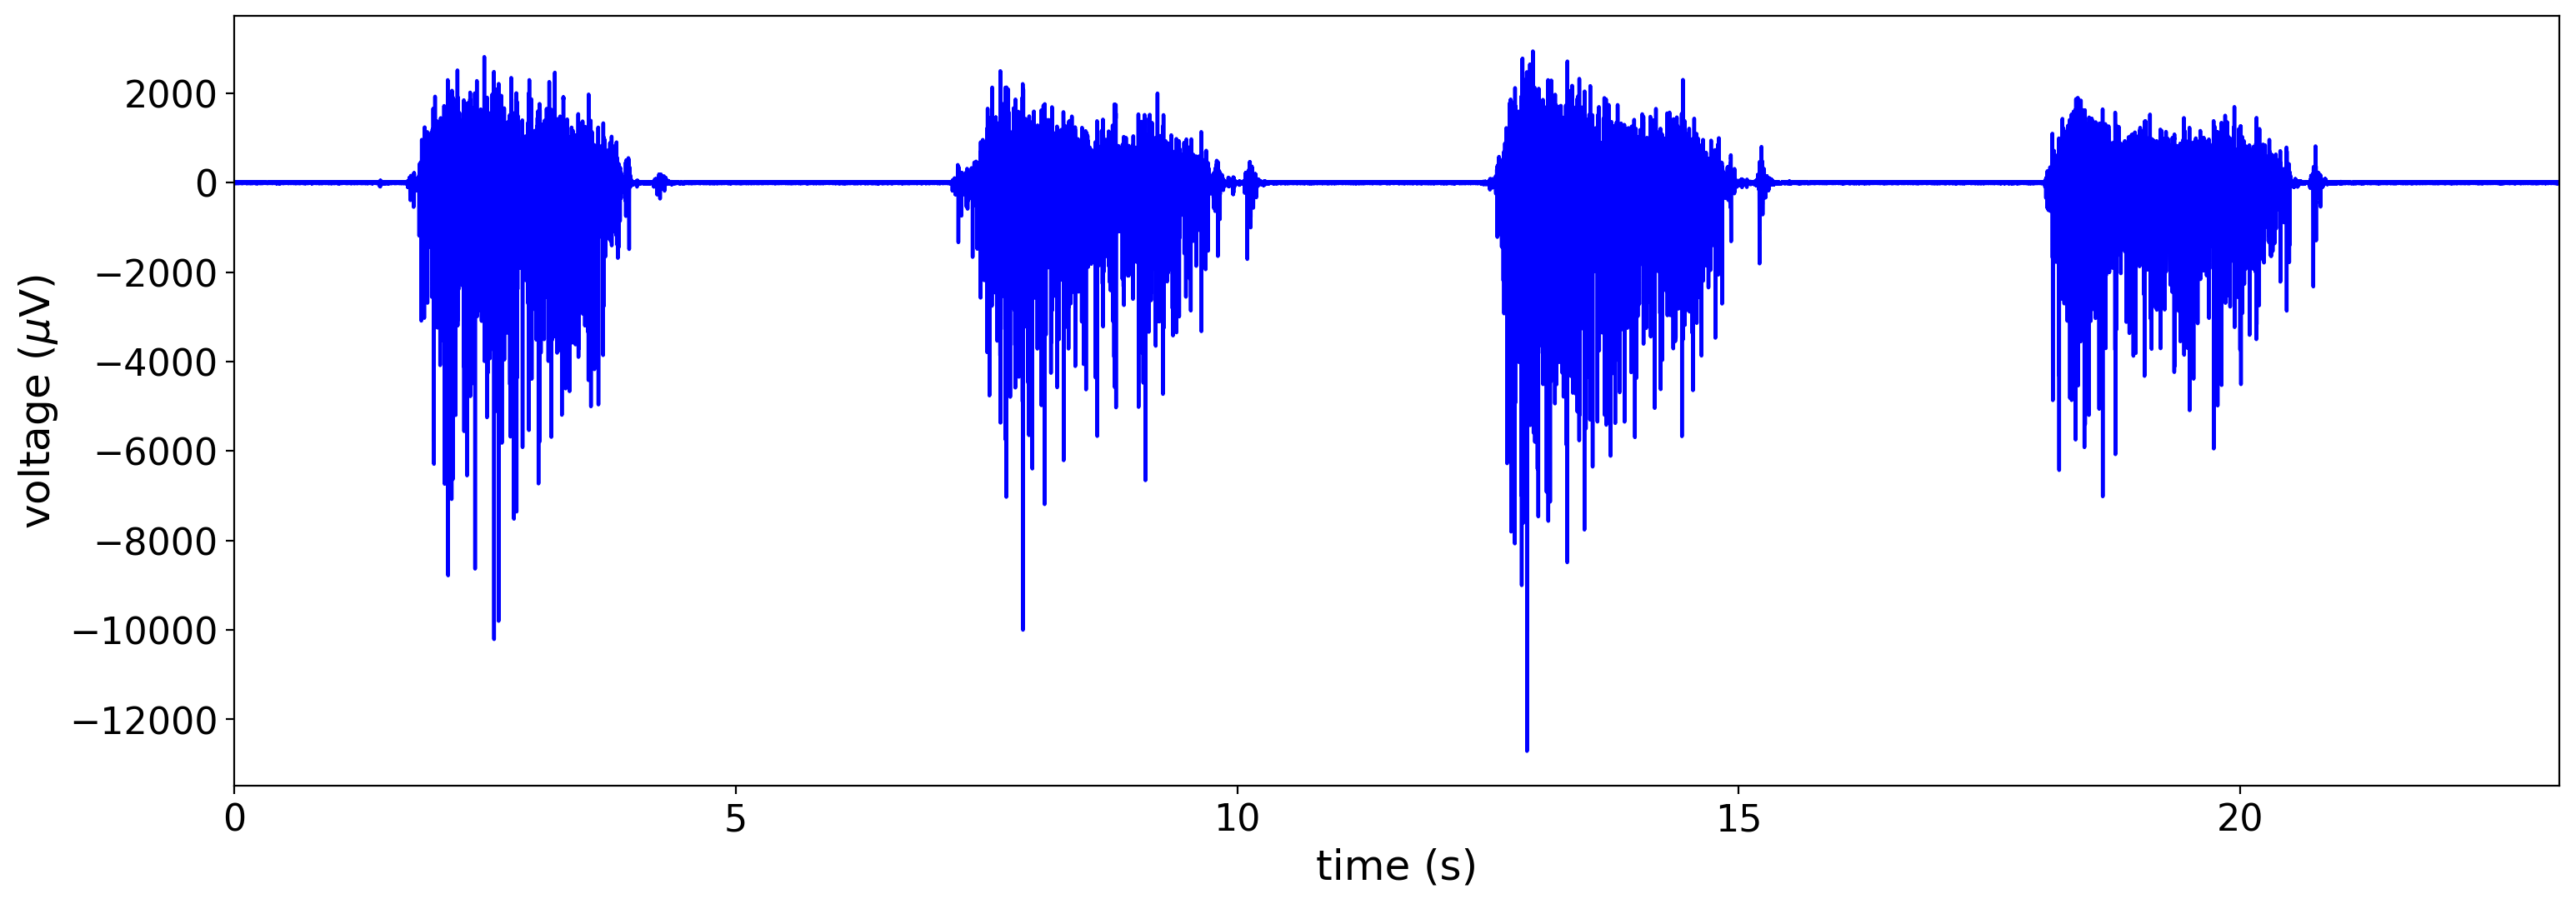

In [19]:
EMG(file='data/S10_EMG_calf_intermittent.wav')

The following EMG was recorded from the biceps as the subject sustained a contraction and gradually increased the amount of force (i.e., recruitment).

The recording has 1 channel(s).
The sampling rate of the recording is 44100 Hz.


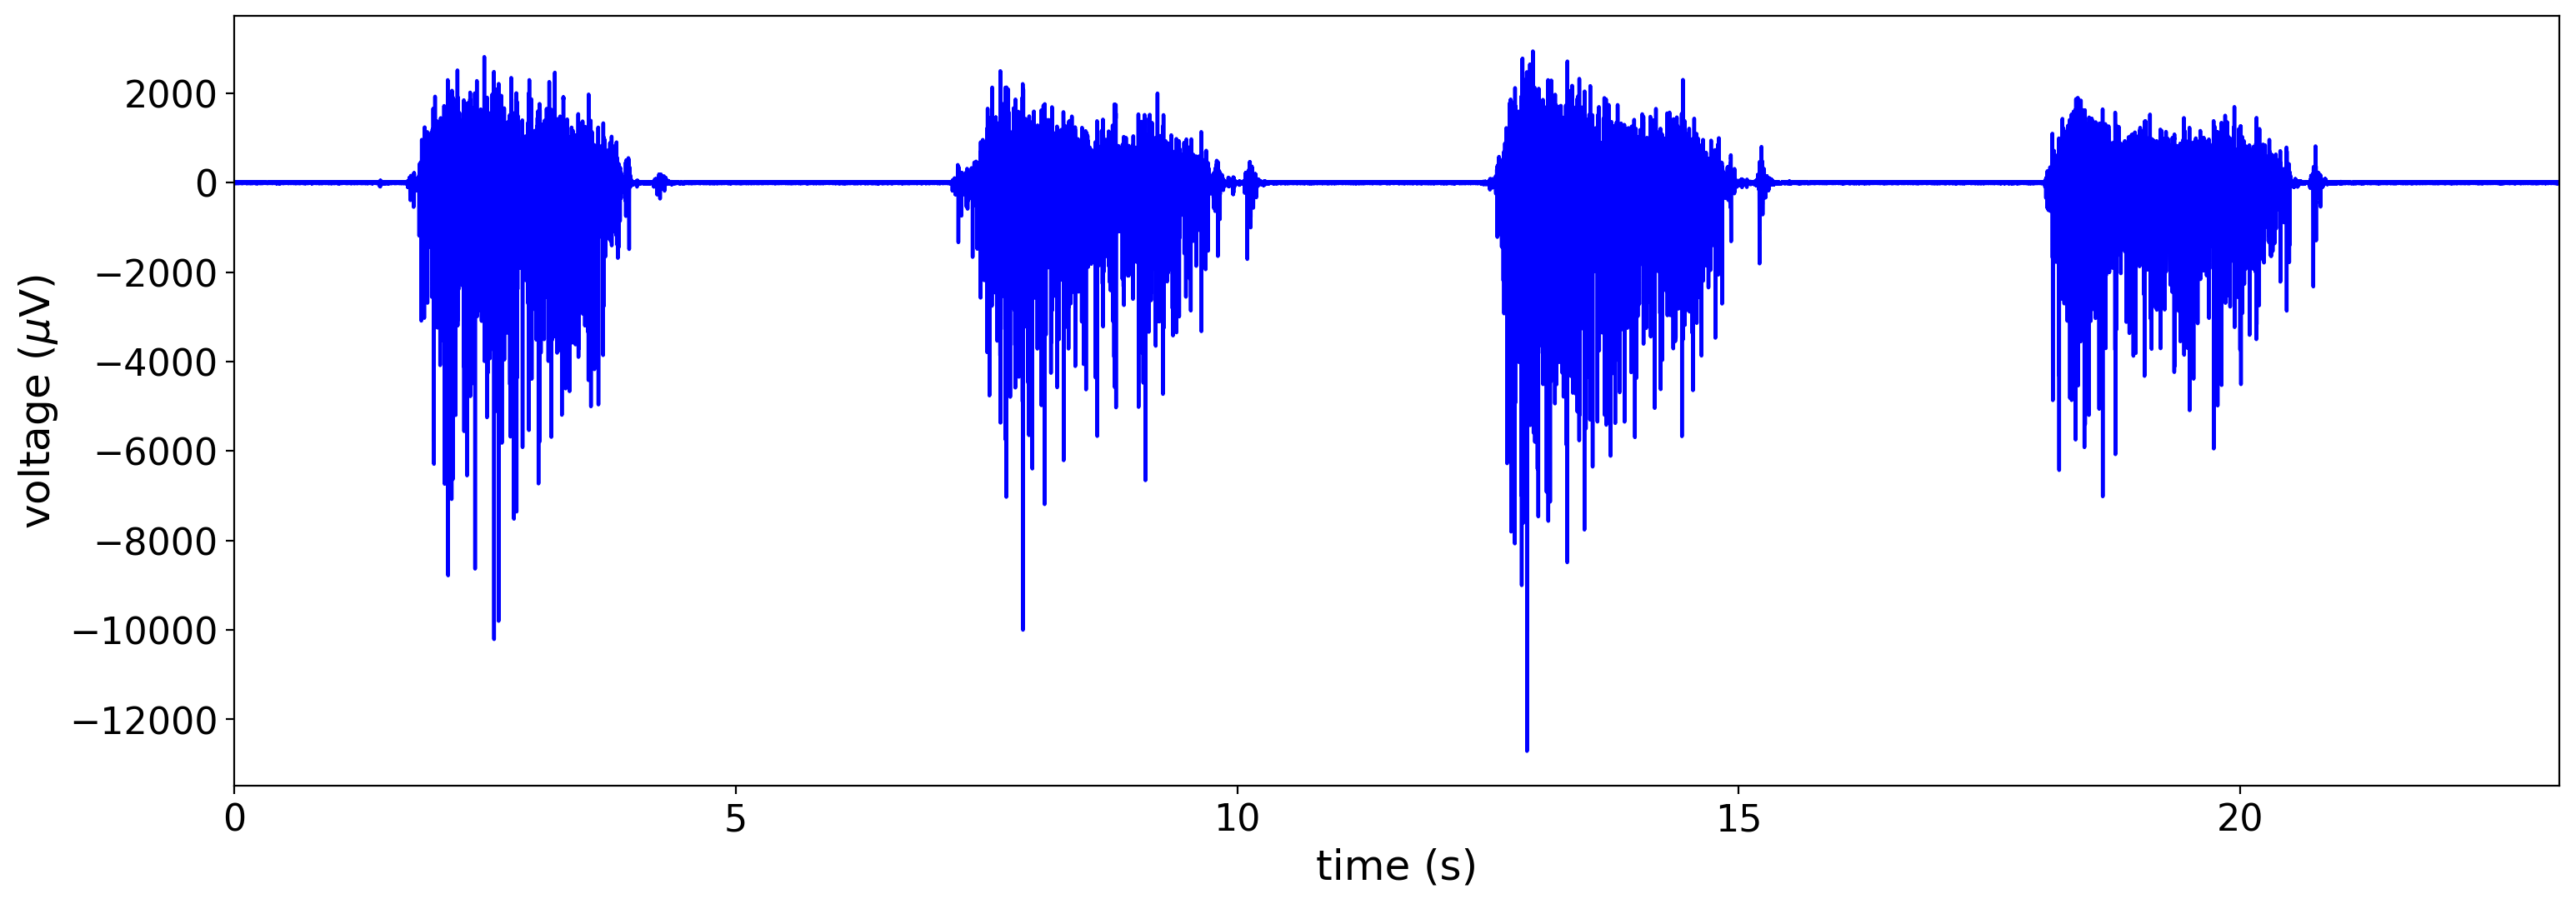

In [20]:
EMG(file='data/S10_EMG_calf_intermittent.wav')

### Study questions and exercises:

- How do the recordings differ when we look at intermittent versus sustained muscle contractions?
- Which features of the EMG recording change as the subject increases the force of contraction, and how? In other words, how might we quantify motor unit recruitment?
- What other exercises could you carry out while recording from the biceps muscle, and how would you expect the EMG recordings to look?
- If you have recording equipment available, record from your own biceps muscle and then extract and graph your data.

### Triceps muscle

The following recording was made from the triceps muscle while the subject performed triceps dips.

The recording has 1 channel(s).
The sampling rate of the recording is 44100 Hz.


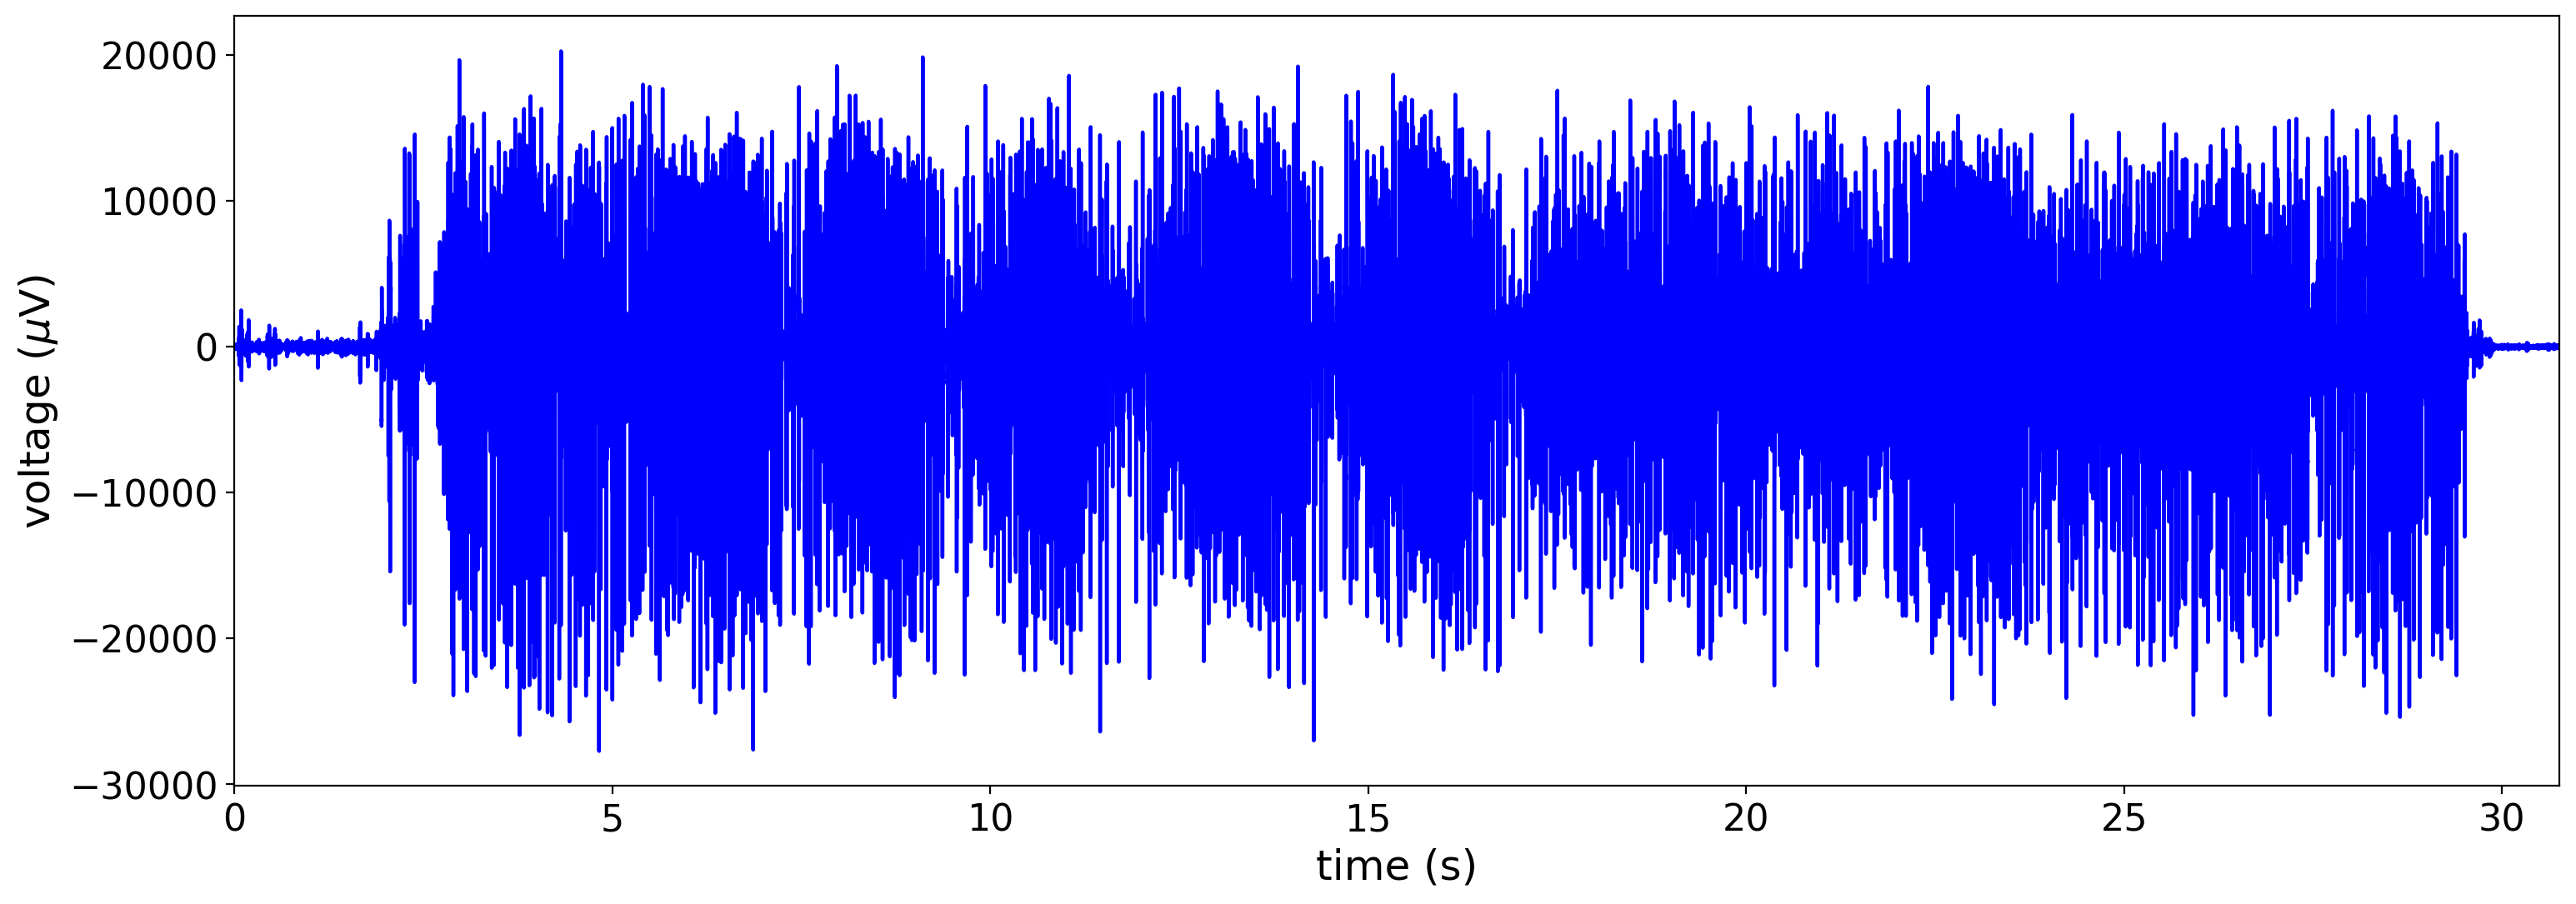

In [23]:
EMG(file='data/S1_EMG_tricep_dips.wav')

This next recording is more complex. It was made from the triceps muscle and included the following sequence of activities: (1) for the first 10 seconds, the subject was at rest, (2) then for the following 10 seconds, the subject turned their arm to activate the triceps isometrically, (3) then the subject changed position, and (4) finally, during the last 20 seconds, the subject repeatedly lifted and lowered a bottle with water inside (i.e., similar to an overhead triceps extension).

The recording has 1 channel(s).
The sampling rate of the recording is 44100 Hz.


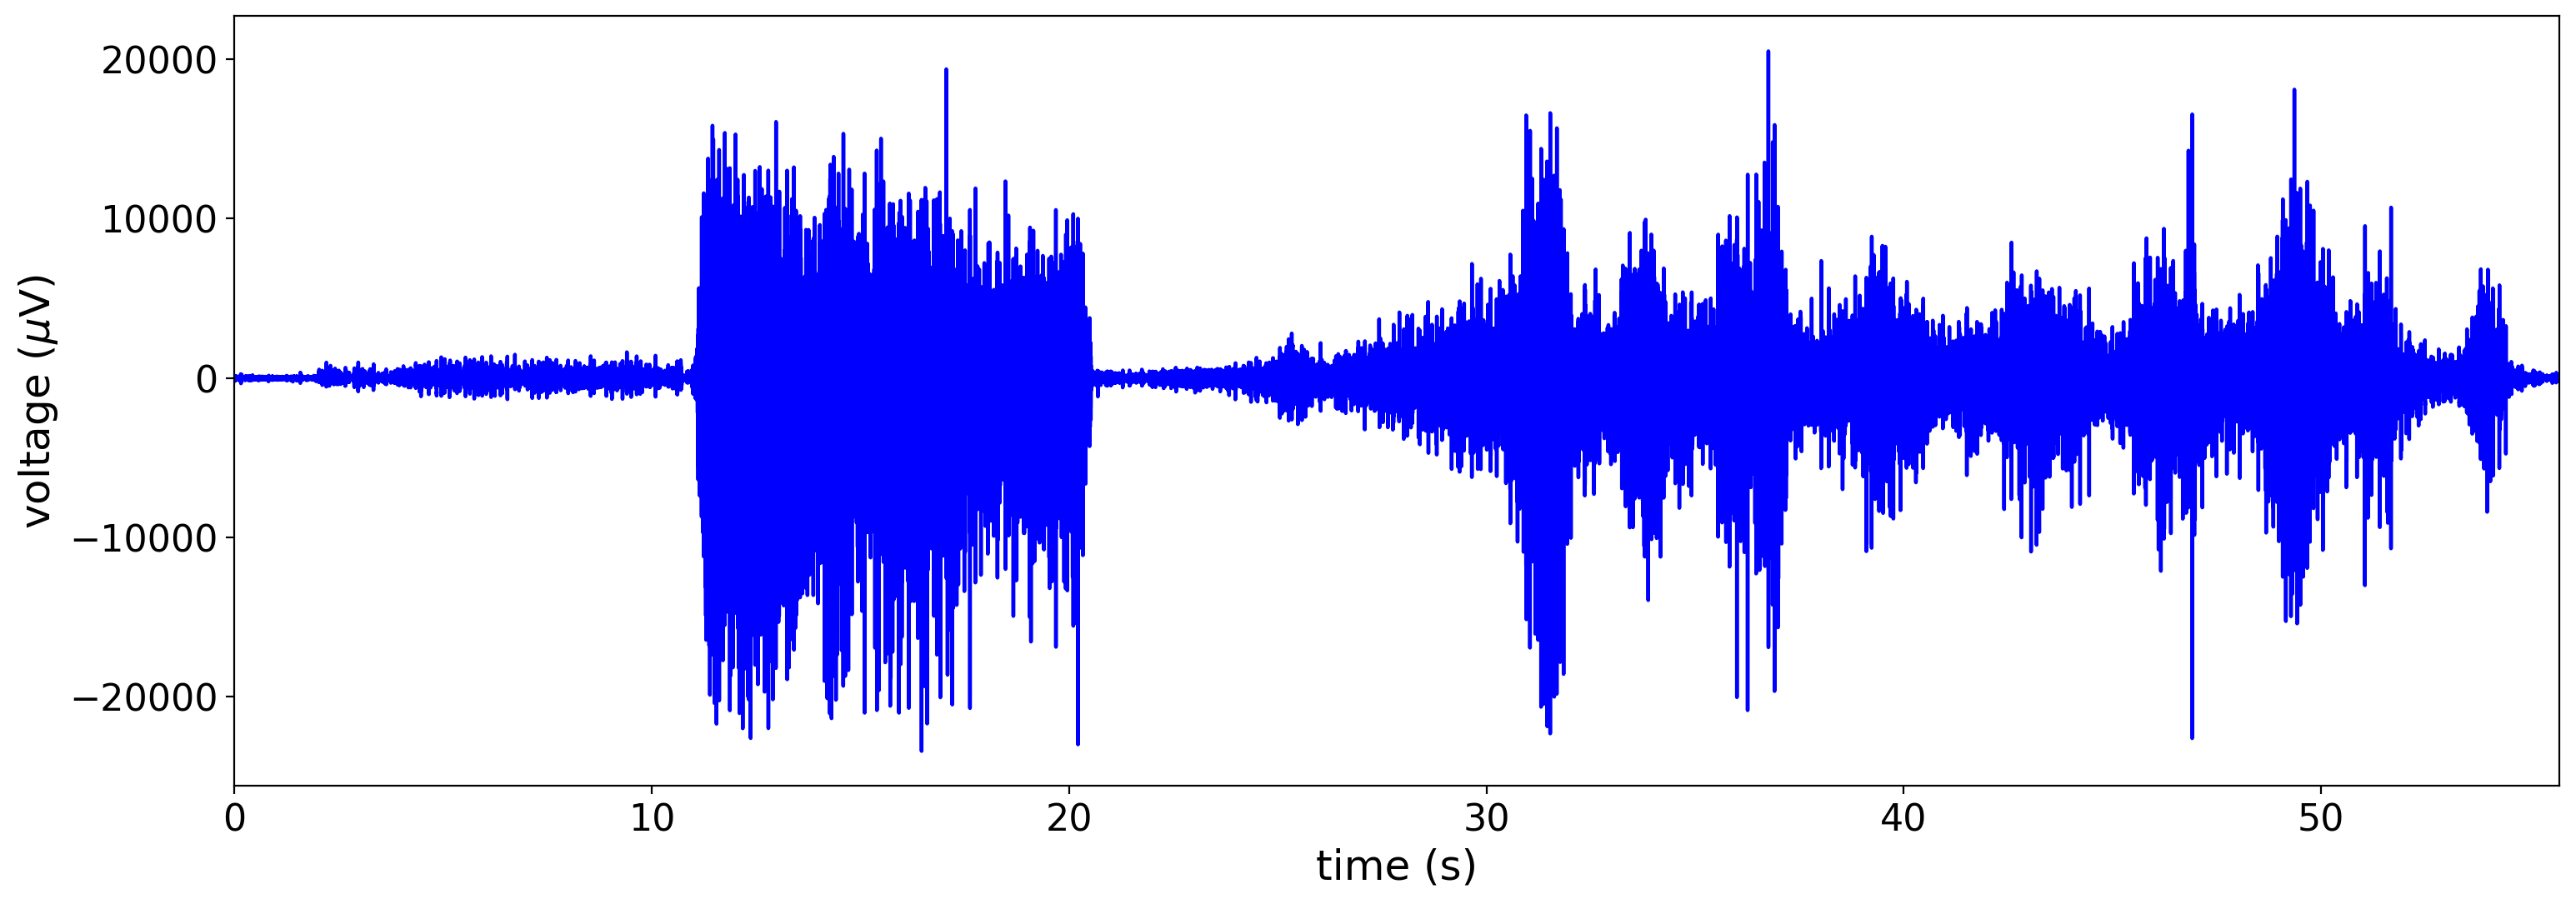

In [24]:
EMG(file='data/S1_EMG_tricep_twistWeight.wav')

### Study questions and exercises:

- Why do you think the triceps dip recording shows a high level of continuous activity despite the fact that the dips involve an up-and-down movement?
- How is the triceps dip activity different from the repeated triceps extension at the end of the second recording, and why?
- What other exercises could you carry out while recording from the triceps muscle, and how would you expect the EMG recordings to look?
- If you have recording equipment available, record from your own triceps muscle and then extract and graph your data.

### Forearm muscles

The following recording was made from the forearm while the subject repeatedly pressed a hand gripper exercise device. It shows five contractions in total, with the last one sustained for a longer period of time than the previous four.

The recording has 1 channel(s).
The sampling rate of the recording is 44100 Hz.


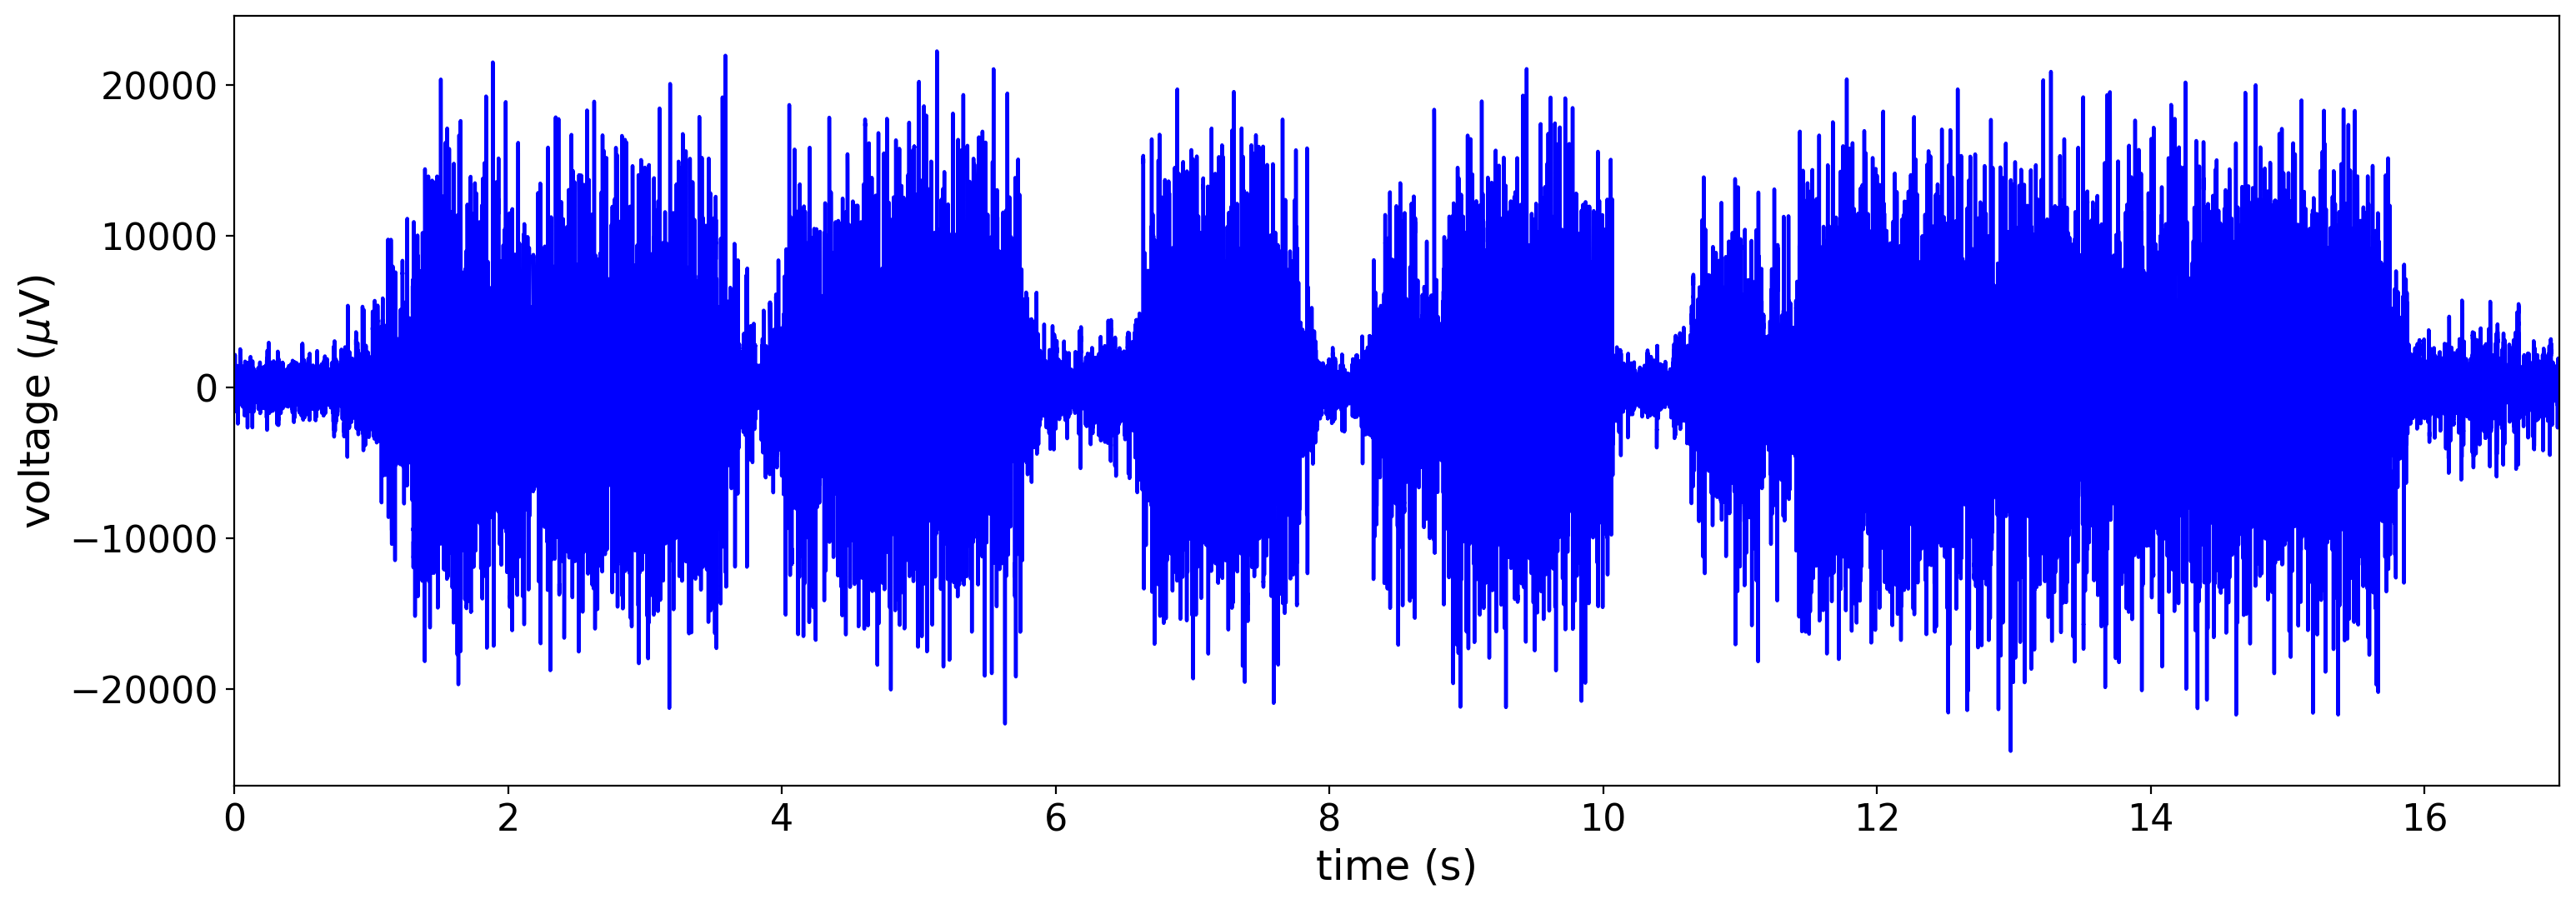

In [25]:
EMG(file='data/S2_EMG_forearm_grip.wav')

The next recording was made from the forearm while the subject participated in an arm wrestling match. Around second 14, the subject lost the match.

The recording has 1 channel(s).
The sampling rate of the recording is 44100 Hz.


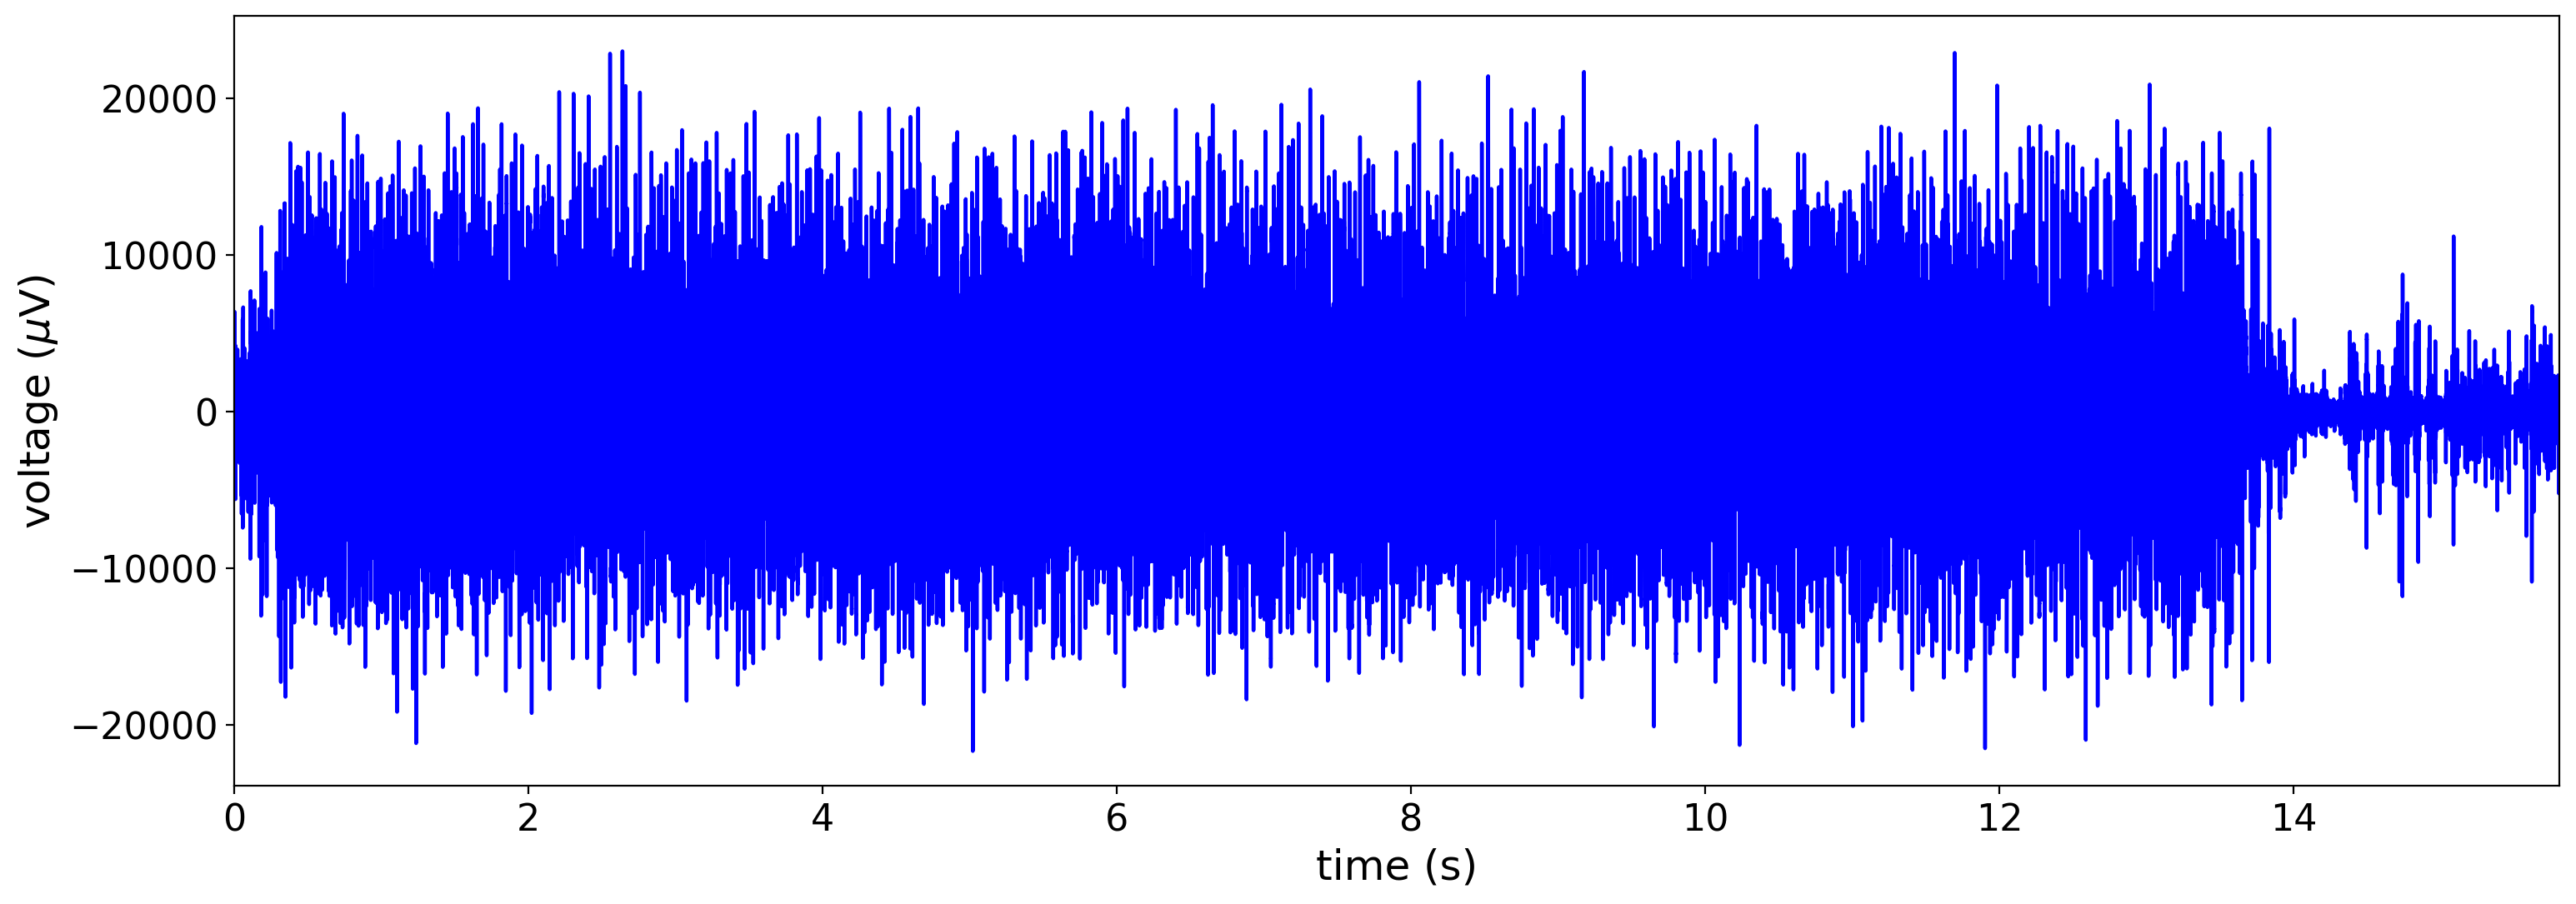

In [26]:
EMG(file='data/S2_EMG_forearm_wrestle.wav')

#### Study questions and exercises:

* What muscles are found in the forearm, and which could be contributing to the EMG signal?
* What other muscles, besides those in the forearm, might be activated during an arm wrestling match? Would you expect to see differences in their EMGs during this activity? 
* What other exercises could you carry out while recording from the forearm muscles, and how would you expect the EMG recordings to look?
* If you have recording equipment available, record from your own forearm and then extract and graph your data.

### Jaw muscles

The following EMG was recorded from the jaw muscles. For the first 50 seconds, the subject  chewed a soft, gummy candy. Then there were 10 seconds of rest. And finally, for the last ten seconds the subject made a forced smile. 

The recording has 1 channel(s).
The sampling rate of the recording is 44100 Hz.


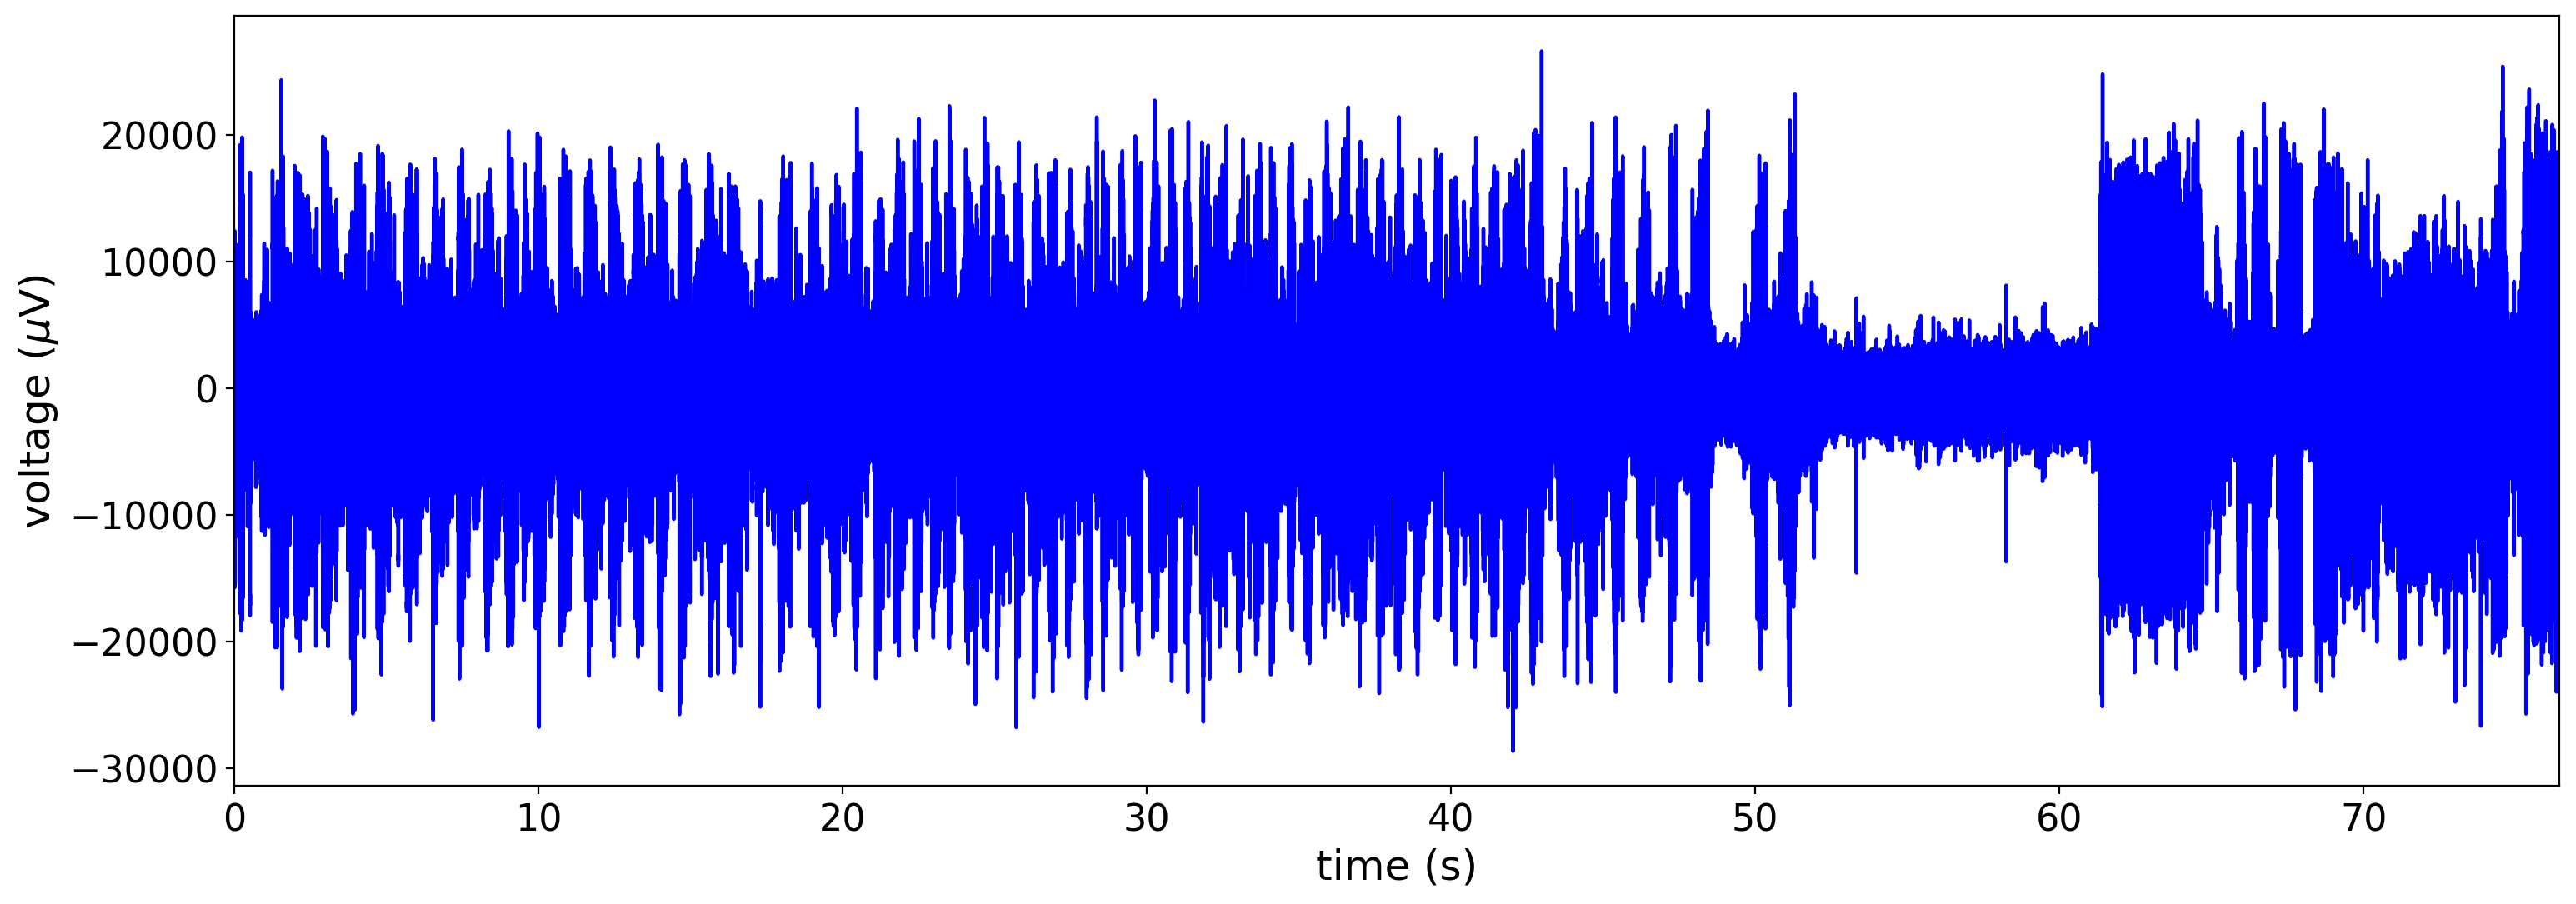

In [27]:
EMG(file='data/S3_EMG_jawMuscle_chewSmile.wav')

### Study questions and exercises:

- Which muscles control chewing and smiling, and which could be contributing to the EMG signal?
- What differences do you see in the EMGs recorded when the subject is chewing versus smiling, and what do you think causes these differences?
- What other activities could you carry out while recording from the jaw or other facial muscles, and how would you expect the EMG recordings to look?
- If you have recording equipment available, record from your own jaw muscles; try experimenting with different electrode placements on the face, and then extract and graph your data

### Abdominal muscles

The following EMG recording was made from the abdominal muscles, specifically rectus abdominis, during lying leg raises.  

The recording has 1 channel(s).
The sampling rate of the recording is 10000 Hz.


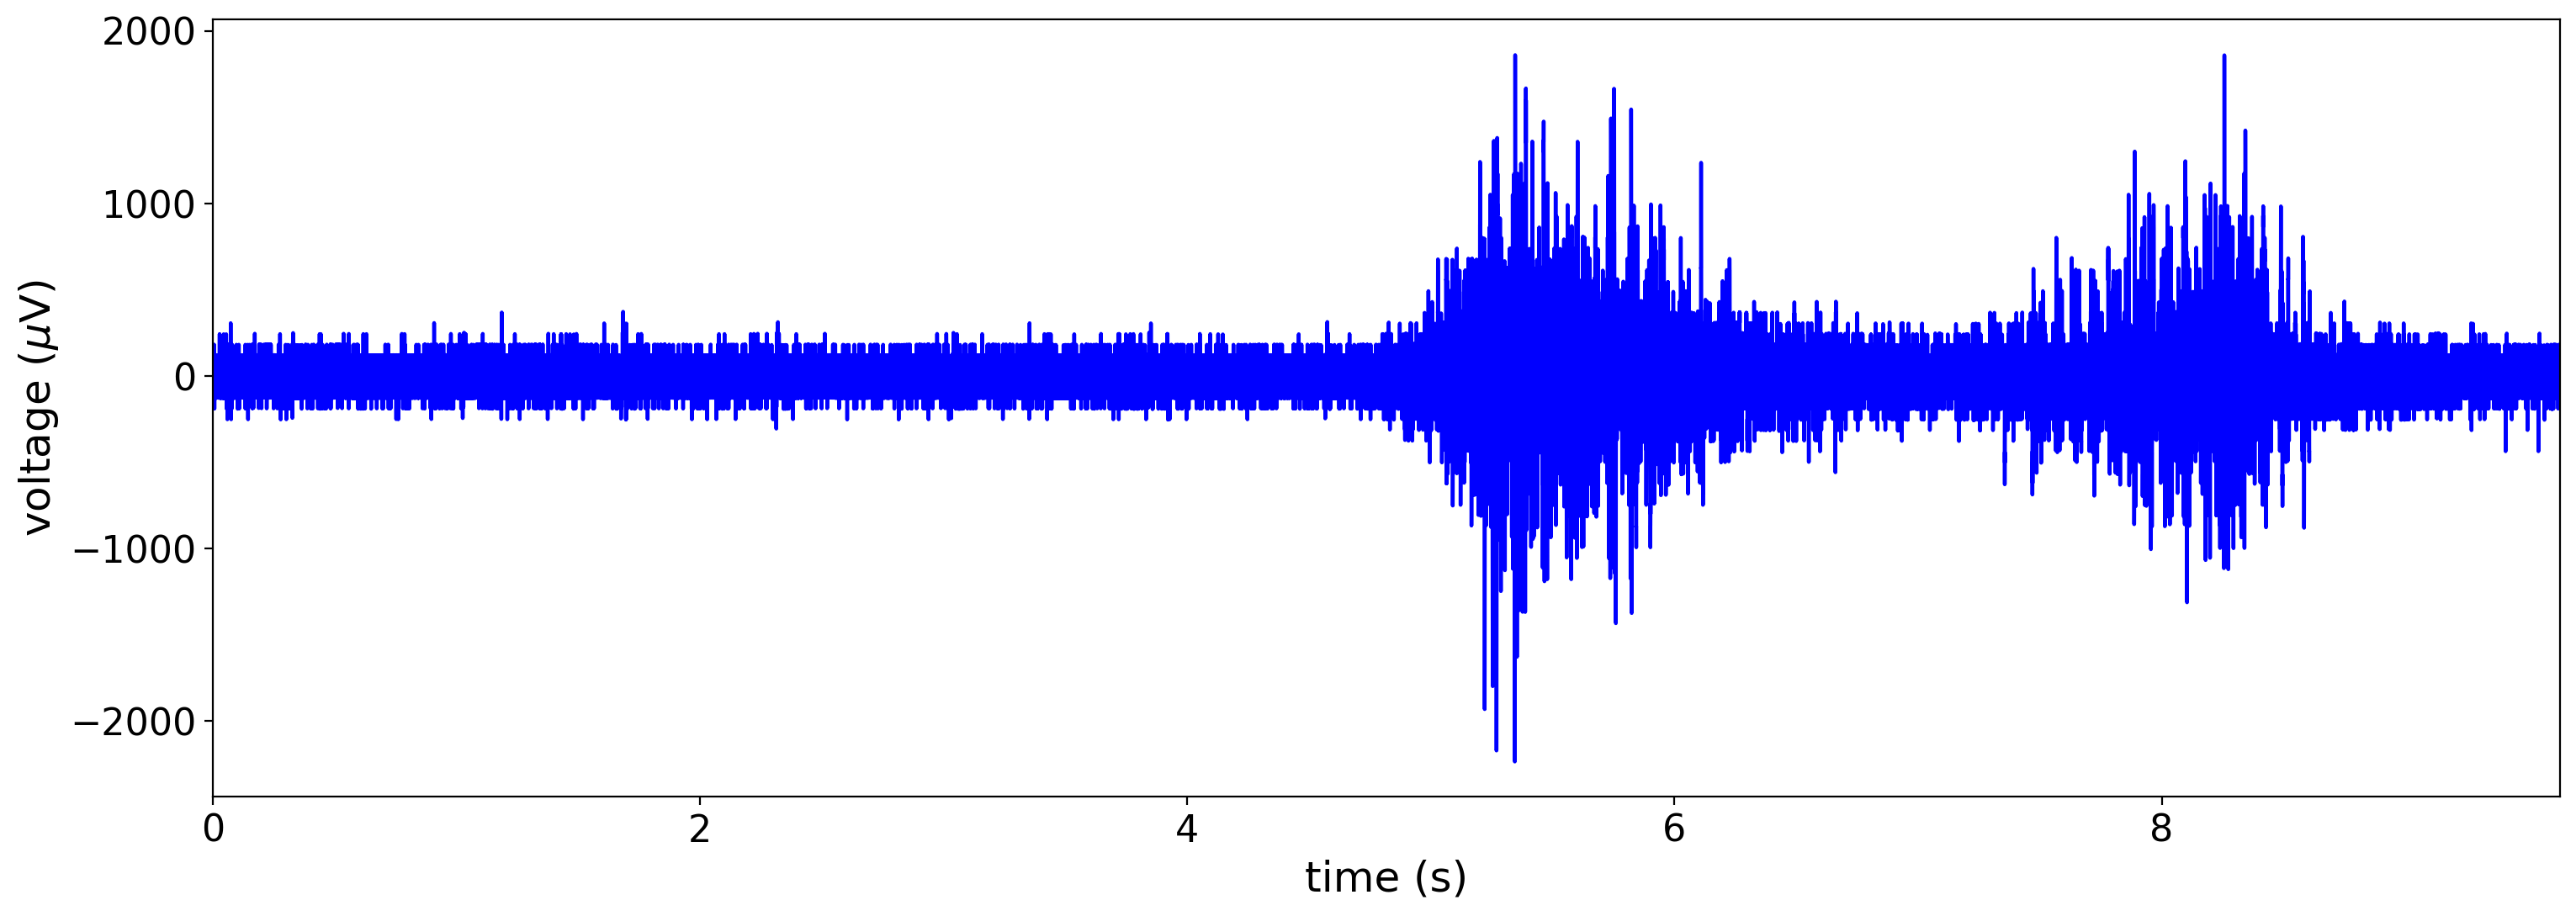

In [28]:
EMG(file='data/S5_EMG_abs_legLift3.wav')

During the next recording, the subject performed a sustained plank.

The recording has 1 channel(s).
The sampling rate of the recording is 10000 Hz.


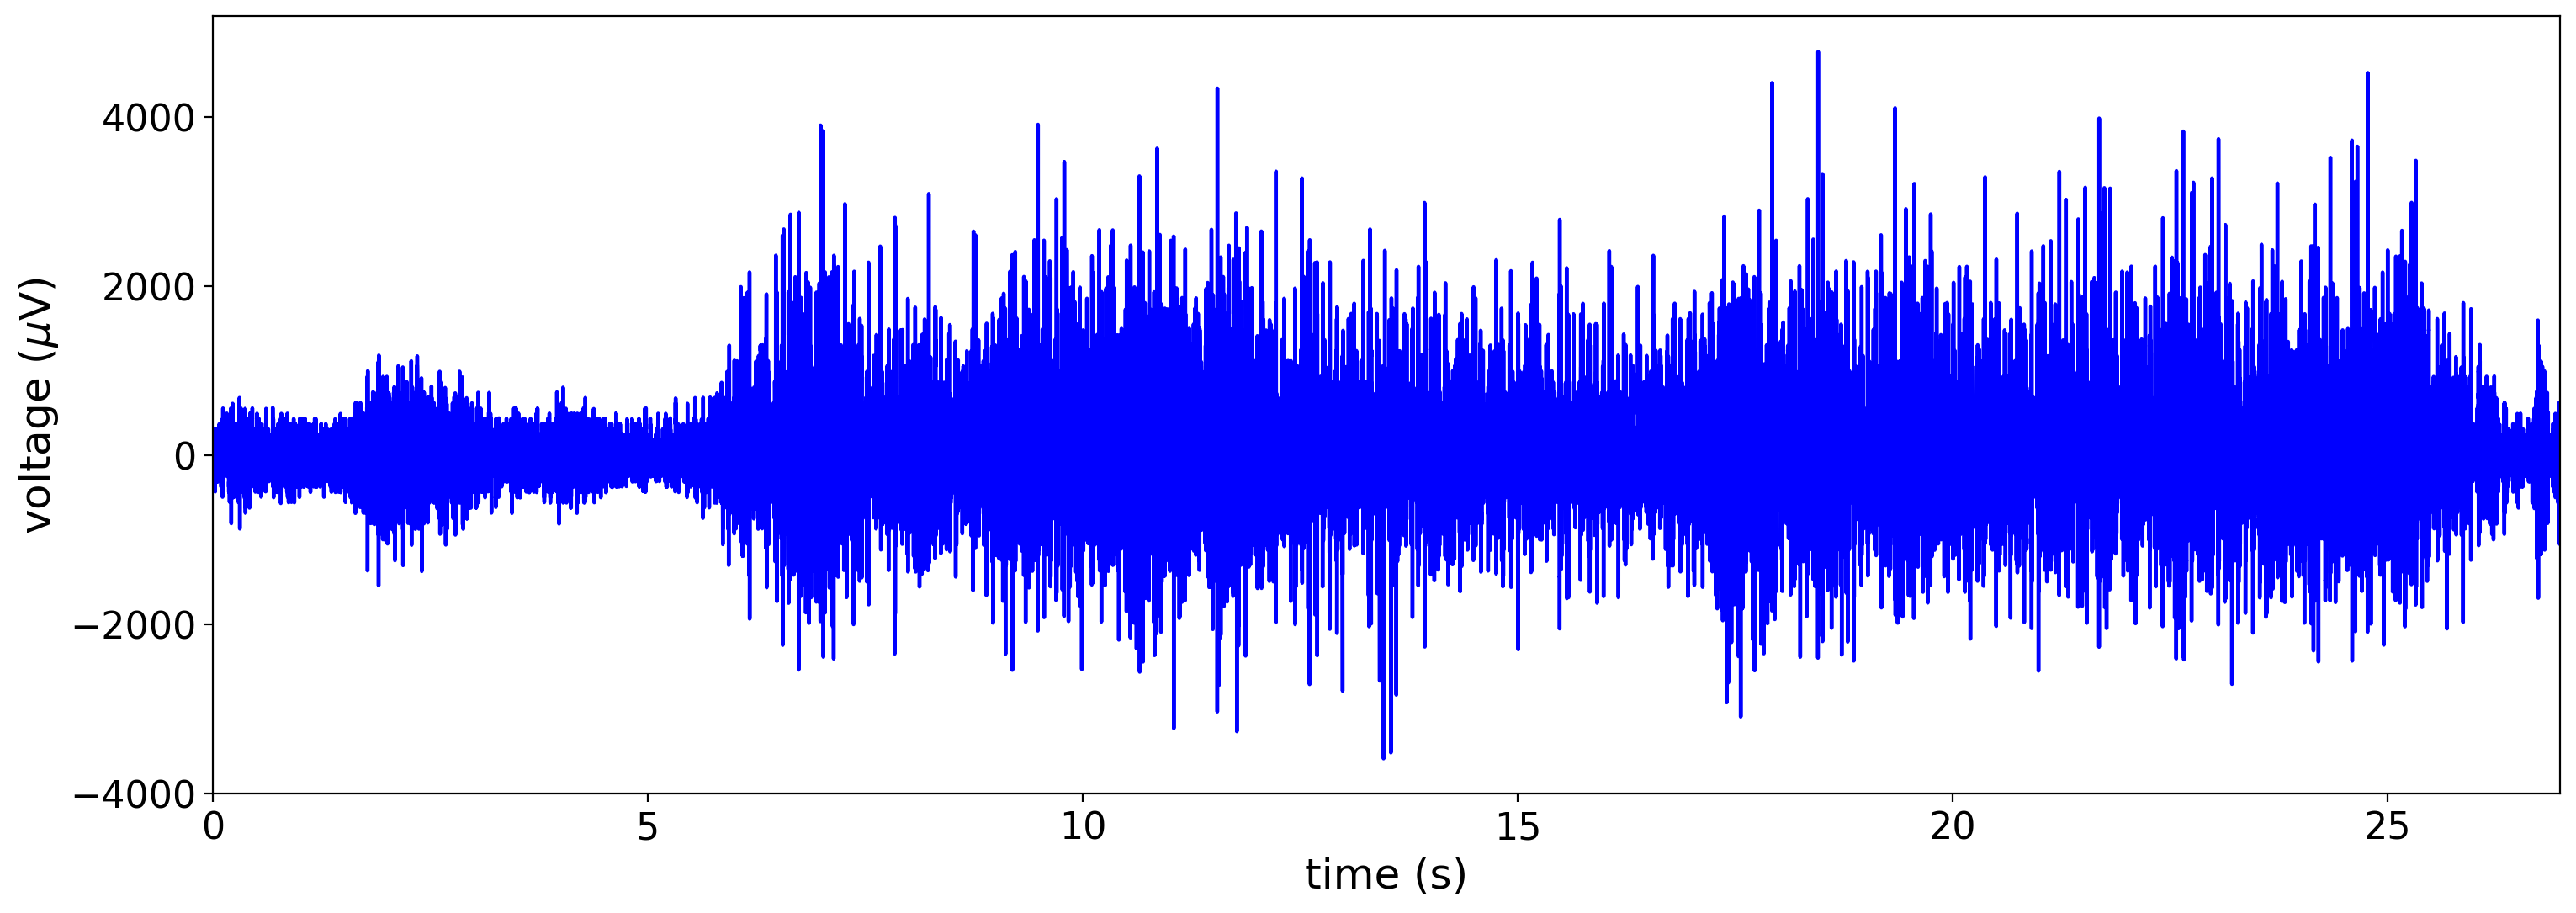

In [29]:
EMG(file='data/S5_EMG_abs_plank.wav')

### Study questions and exercises:

* What do you think would happen to the EMG recordings if the subject performed more lying leg raises, or tried to hold the plank for longer? In other words, how might fatigue show up on the two recordings?
* How could we quantify fatigue, and how might the quantification be different for the two types of exercise?
* What other exercises could you do to activate the abdominal muscles, or which other ab muscles could you record from, and how would you expect the EMG recordings to look?
* If you have recording equipment available, record from your own abdominal muscles, try experimenting with different electrode placements and exercises, and then extract and graph your data.

### Quadriceps muscles

The following EMG was recorded from the quadriceps muscles while the subject performed a one-legged squat, also known as a Bulgarian squat. The subject also had a backpack filled with books on during the exercise for added weight.

The recording has 1 channel(s).
The sampling rate of the recording is 10000 Hz.


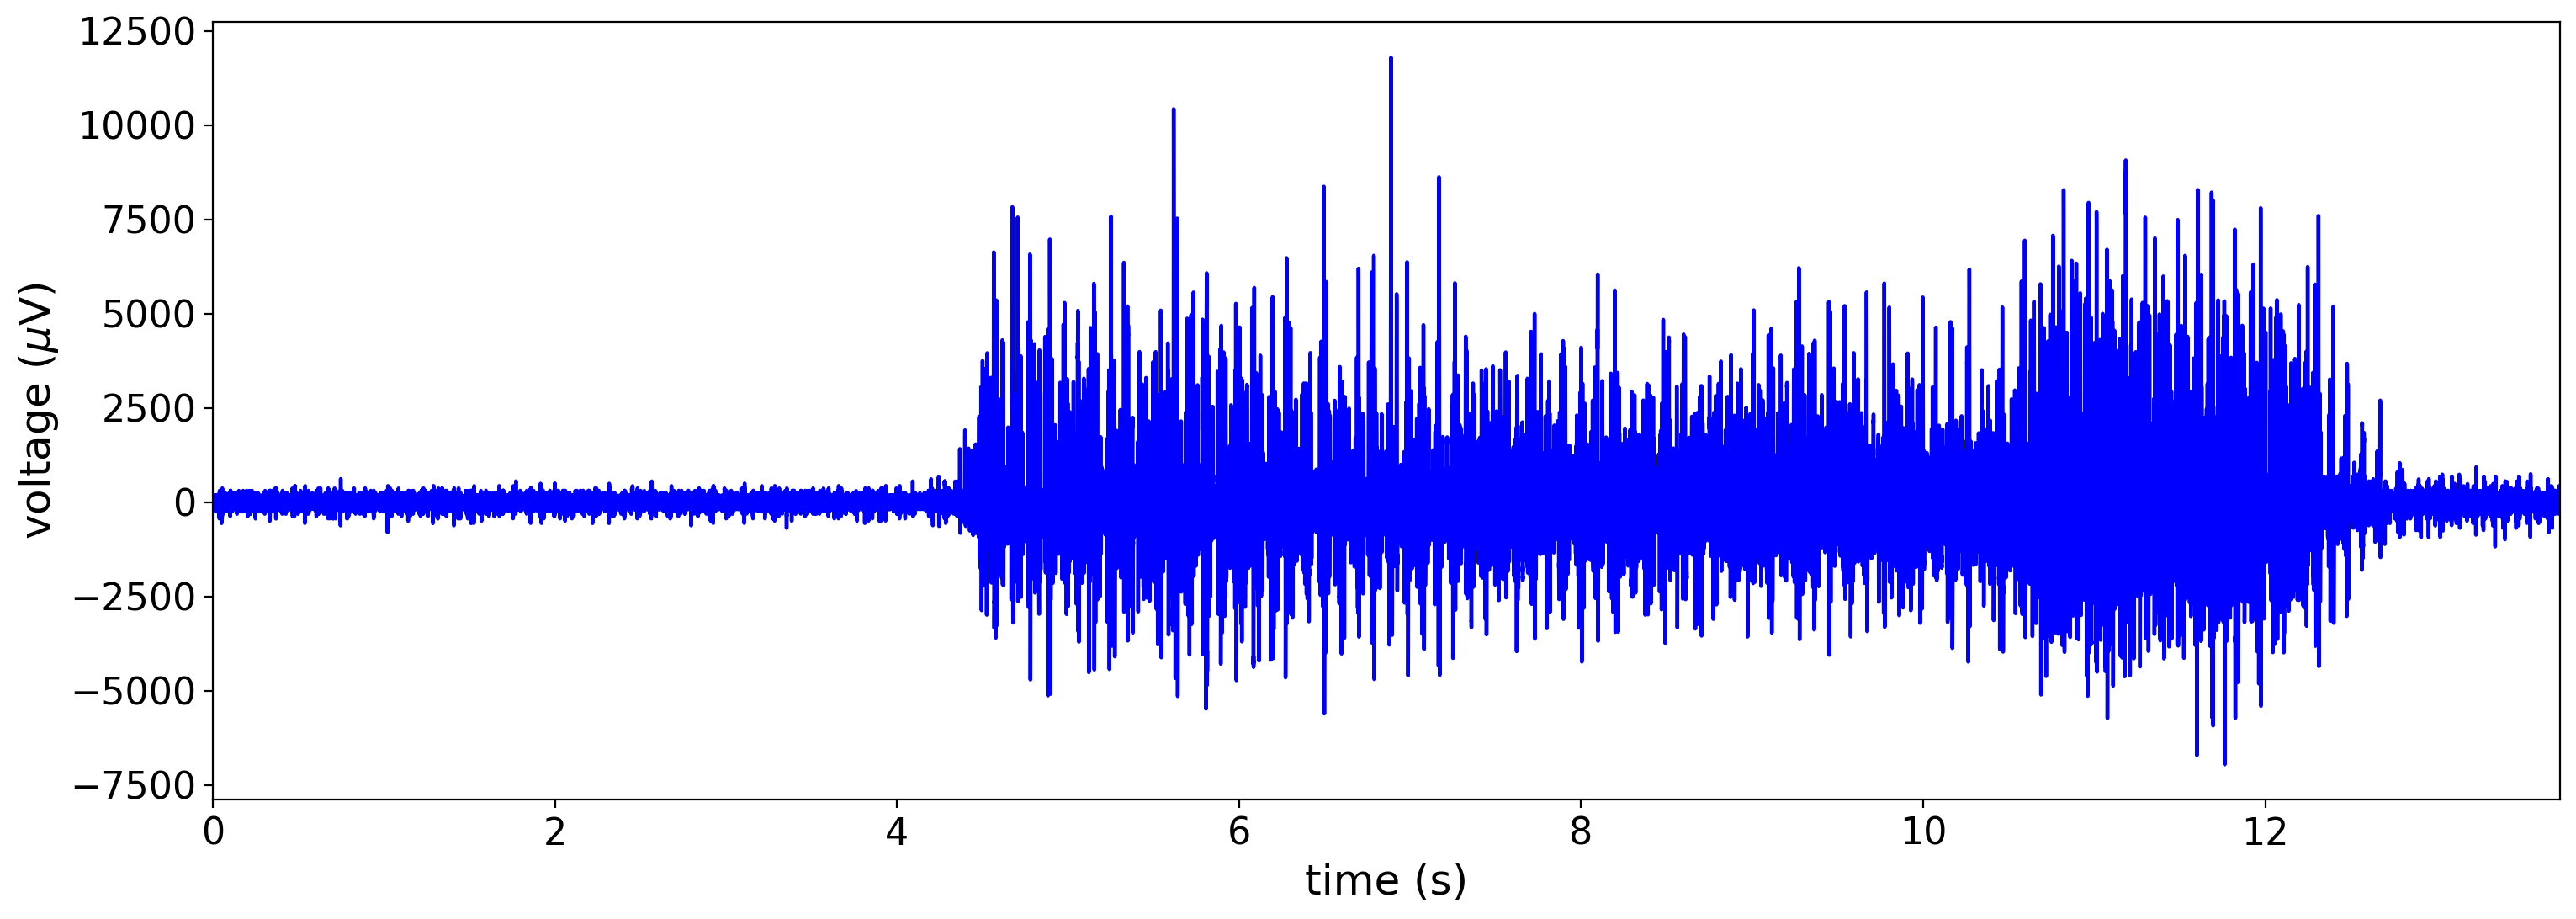

In [30]:
EMG(file='data/S9_EMG_quadricep_oneLegSquat1.wav')

In the next recording, the subject sustained a wall squat, maintaining the backpack on top of the legs for added weight.

The recording has 1 channel(s).
The sampling rate of the recording is 10000 Hz.


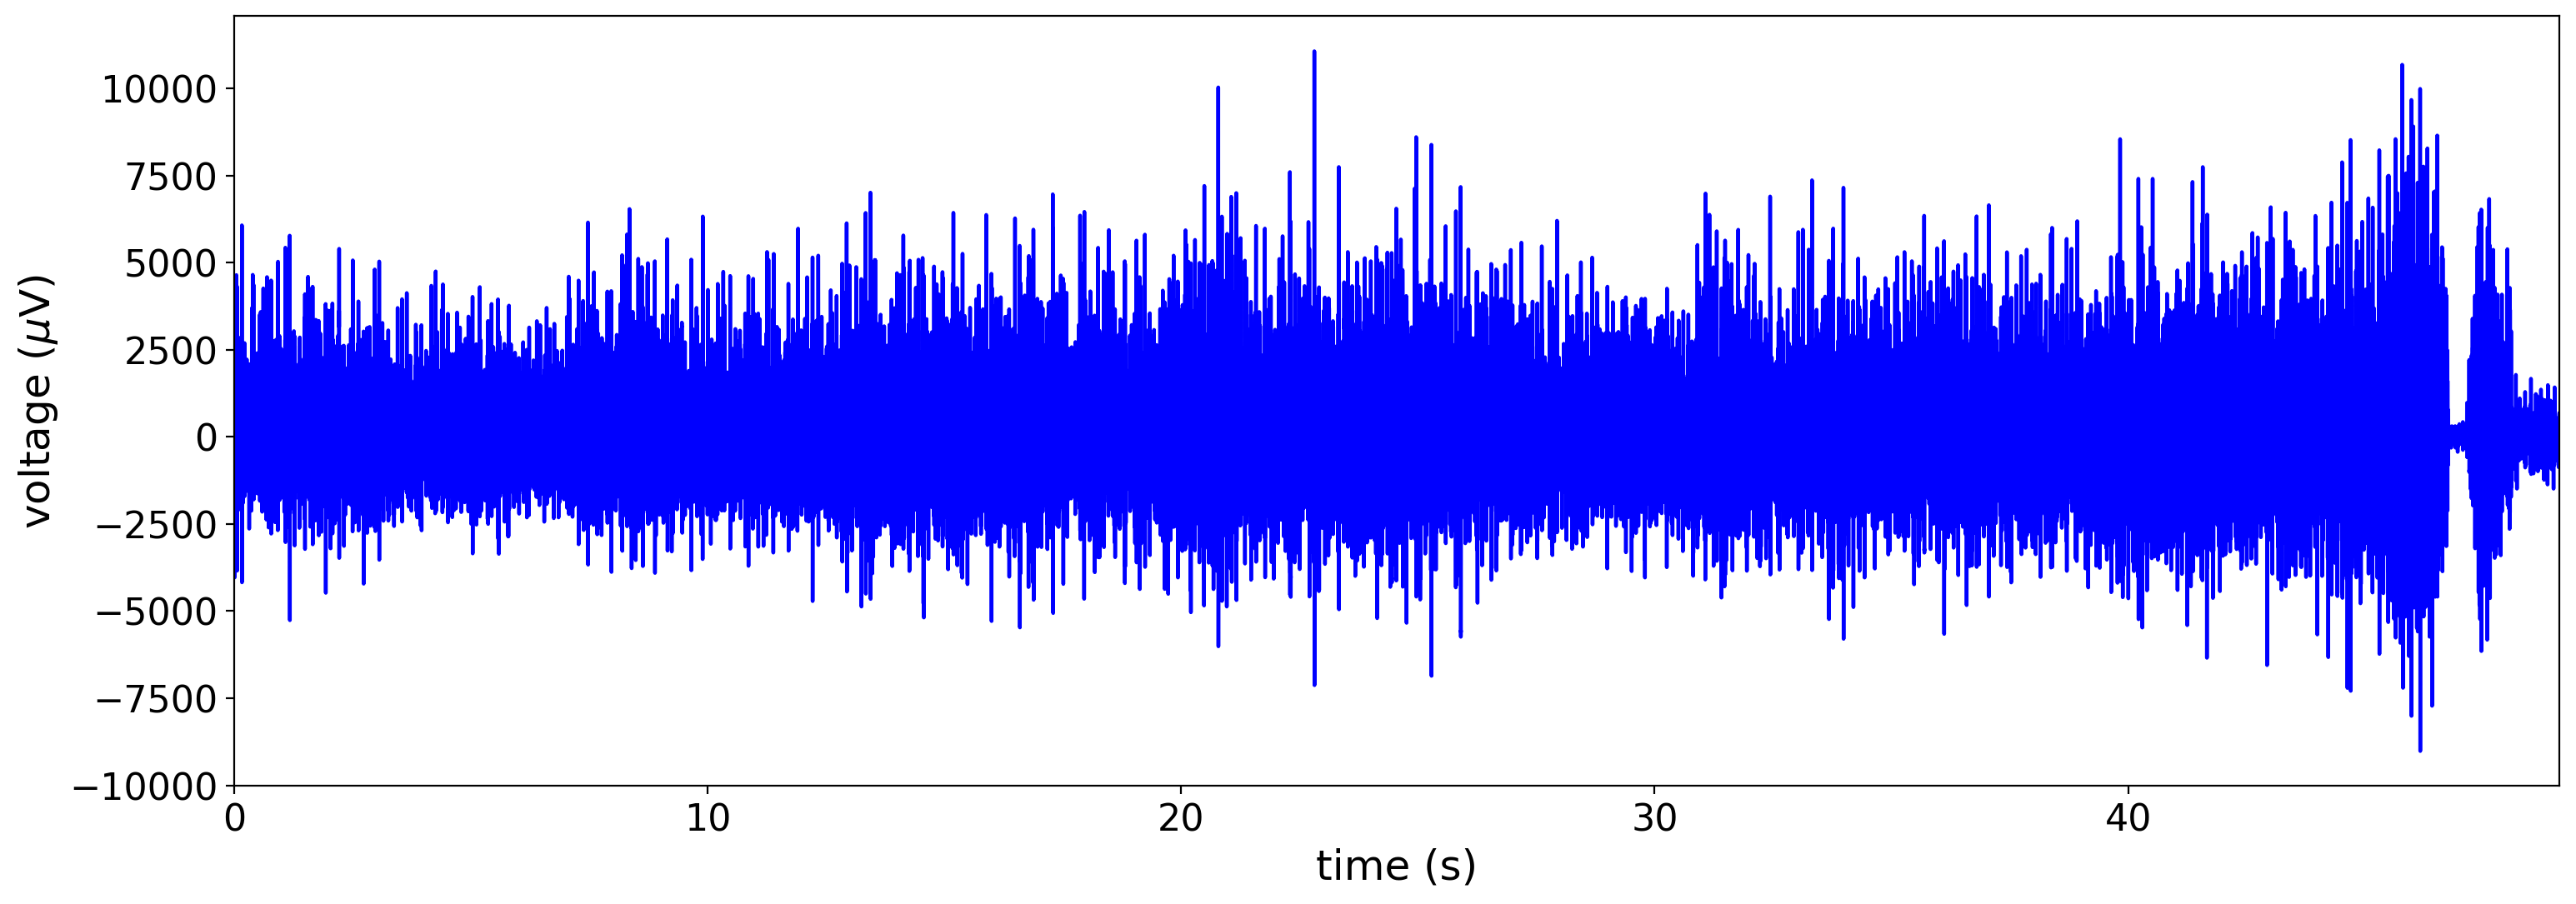

In [31]:
EMG(file='data/S9_EMG_quadricep_squatSustained.wav')

### Study questions and exercises:

- What muscles make up the quadriceps group, and which could be contributing to the EMG signal?
- What factors could explain the fluctuations seen in the two recordings? What might have caused the increased amplitude at the end of the wall squat recording?
- What other exercises could you perform while recording from the quadriceps muscles, and how would you expect the EMG recordings to look?
- If you have recording equipment available, record from your own quadriceps, try experimenting with different electrode placements, and then extract and graph your data.

You can explore more recordings from [our repository](https://github.com/emckiernan/electrophys/tree/master/EMG/EMGbasics/data). Or, record your own EMGs and experiment with electrode placement and different exercises to see how it affects the signal.